# Tensorflow in Practice: Course 2 - Week 1

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

images_directory = 'C:\\DataScience\\Kaggle\\dogs_vs_cats\\train\\subset'

# rescale param rescales all images by the param i.e. by 1/255
idgen_object_train = ImageDataGenerator(rescale=1./255)
idgen_object_valid = ImageDataGenerator(rescale=1./255)

train_data_generator = idgen_object_train.flow_from_directory(\
    os.path.join(images_directory, "training"),\
    target_size = (150, 150),\
    batch_size = 20,\
    class_mode = 'binary')

valid_data_generator = idgen_object_train.flow_from_directory(\
    os.path.join(images_directory, "validation"),\
    target_size = (150, 150),\
    batch_size = 20,\
    class_mode = 'binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
class myCallBack(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('val_acc') > 0.90:
            self.model.stop_training = True

model.compile(loss='binary_crossentropy',\
    optimizer=tf.optimizers.RMSprop(lr=1e-4),\
    metrics=['acc'])

In [5]:
history = model.fit_generator(\
                             train_data_generator,\
                             steps_per_epoch=100,\
                             epochs=5,\
                             validation_data=valid_data_generator,\
                             validation_steps=50,
                             callbacks=[myCallBack()])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 105s 1s/step - loss: 0.6991 - acc: 0.5550 - val_loss: 0.6661 - val_acc: 0.5620
Epoch 2/5
100/100 [==============================] - 146s 1s/step - loss: 0.6567 - acc: 0.6075 - val_loss: 0.6612 - val_acc: 0.5790
Epoch 3/5
100/100 [==============================] - 117s 1s/step - loss: 0.6207 - acc: 0.6515 - val_loss: 0.6276 - val_acc: 0.6460
Epoch 4/5
100/100 [==============================] - 181s 2s/step - loss: 0.5957 - acc: 0.6805 - val_loss: 0.6280 - val_acc: 0.6340
Epoch 5/5
100/100 [==============================] - 127s 1s/step - loss: 0.5784 - acc: 0.6965 - val_loss: 0.6001 - val_acc: 0.6750


In [6]:
history = model.fit_generator(\
                             train_data_generator,\
                             steps_per_epoch=100,\
                             epochs=10,\
                             validation_data=valid_data_generator,\
                             validation_steps=50,
                             callbacks=[myCallBack()])

Epoch 1/10
100/100 [==============================] - 144s 1s/step - loss: 0.5660 - acc: 0.7070 - val_loss: 0.5923 - val_acc: 0.6840
Epoch 2/10
100/100 [==============================] - 142s 1s/step - loss: 0.5568 - acc: 0.7180 - val_loss: 0.5730 - val_acc: 0.7020
Epoch 3/10
100/100 [==============================] - 118s 1s/step - loss: 0.5191 - acc: 0.7510 - val_loss: 0.5731 - val_acc: 0.6940
Epoch 4/10
100/100 [==============================] - 118s 1s/step - loss: 0.5178 - acc: 0.7490 - val_loss: 0.5728 - val_acc: 0.6990
Epoch 5/10
100/100 [==============================] - 118s 1s/step - loss: 0.4950 - acc: 0.7615 - val_loss: 0.6293 - val_acc: 0.6650
Epoch 6/10
100/100 [==============================] - 140s 1s/step - loss: 0.4763 - acc: 0.7795 - val_loss: 0.5588 - val_acc: 0.7160
Epoch 7/10
100/100 [==============================] - 219s 2s/step - loss: 0.4718 - acc: 0.7815 - val_loss: 0.5616 - val_acc: 0.7100
Epoch 8/10
100/100 [==============================] - 170s 2s/step - 

In [7]:
model.save('cats_and_dogs_small_1.h5')

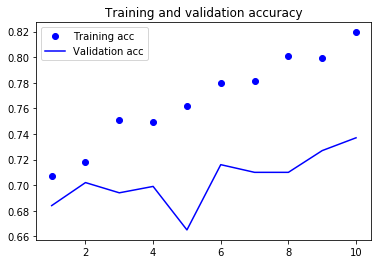

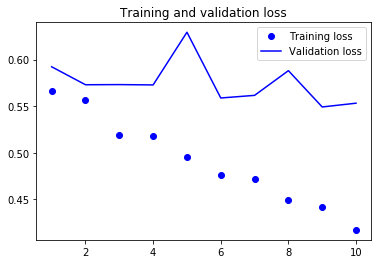

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()